### Student Information
Name: 葛洋晴 Marcelo

Student ID: 108006205

GitHub ID: GrayGama

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [ ]:
### Begin Assignment Here

> ## **First Part: Take Home Exercises (Solutions)**

**_Note:_** 

Most of the variables from the code answers from the exercises in this notebook are not defined. If you would like to verify the answer you can copy and paste the respective exercise solution with the exercise from the DM2023-Lab1-Master.ipynb.

## **Exercise 2:** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [ ]:
# Answer here
# So far we leearned how to do index, loc and iloc for query.
# Other querying techniques are: Boolean Indexing
print("Boolean: \n", X[:10][X['category'] < 3])   # comes with a UserWarning 

# The query() method allows you to use string expressions to filter data.
# X[:20][X.query('category_name == sci.med')]
print("\nQuery method:")
X.query("category < 3")[:10]
X.query("category_name == 'comp.graphics'")[:10]

# By filter() Method:
print("\nFilter method:")
X.filter(items=['text', 'category_name'])[:10]

## **Exercise 5:** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

**Answer here:**

The .isnull() function checks each element of the data structure against the designated 
missing value representation for the datatype. For most dtypes in pandas, 
None or numpy.nan is considered the missing value representation. 

## **Exercise 6:** 

**Answer here:**

Differences: 
1)  X_sample is a Dataframe with 1000 elements taken from X Dataframe and rearranged randomly.
2)  X_sample has two more columns which are unigrams and bin_category 


## **Exercise 8:**
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [ ]:
# Answer here
ct_count_orig = X.source.value_counts()
ct_count_sample = X_sample.category_name.value_counts()

X_plot = pd.DataFrame({'Original': ct_count_orig, 'Sample': ct_count_sample})
X_plot.sort_values(by='Original', ascending=False).plot(kind = 'bar',
                                                        title = 'Category distribution',
                                                        rot=0, fontsize=10,
                                                        #figsize = (10,6),
                                                        width = 0.4,
                                                        xlabel=''
                                                        )

## **Exercise 10:** 
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
# Answer here
import numpy as np

indices_of_ones = np.where(X_dense_array[4] == 1)[0]

print(indices_of_ones)

words = [count_vect.get_feature_names_out()[index] for index in indices_of_ones]

print(words)

## **Exercise 11:** 


In [ ]:
# Answer here
# plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
# plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]
# plot_z = X_counts[0:100, 0:100].toarray()

# df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# #display(df_todraw)
# plt.subplots(figsize=(9, 7))
# ax = sns.heatmap(df_todraw,
#                  cmap="PuRd",
#                  vmin=0, vmax=1, 
#                  #annot=True
#                  )

# Sampling by term frequency:
term_sums = np.ravel(X_counts.sum(axis=0))
top_term_indices = np.argsort(term_sums)[-20:]
sampled_X_counts = X_counts[:, top_term_indices]
#print(sampled_X_counts)

# Sparse Matrix Visualization:
#plt.spy(sampled_X_counts, markersize=10)

# Histogram of Term Frequencies:
plt.hist(term_sums, bins=50, log=True)

## **Exercise 12:**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [ ]:
# Answer here
#from mpl_toolkits.mplot3d import Axes3D

X_reduced_n3 = PCA(n_components = 3).fit_transform(X_counts.toarray())

angles = [(30, 30), (60, 30), (30, 60)]  # Define three different angles

for angle in angles:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_reduced_n3[:, 0], X_reduced_n3[:, 1], X_reduced_n3[:, 2], c='r', marker='o')
    ax.set_title(f"View angle: {angle}")
    ax.view_init(angle[0], angle[1])
    plt.show()

## **Exercise 13:**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
# Answer here

# Sorry I wasn't really sure how to do that :(

# import plotly.express as px

# # Convert the reduced data to a DataFrame for easier plotting
# df = pd.DataFrame(term_frequencies, columns=['PC1'])

# fig = px.scatter_3d(df, x='PC1')

# fig.show()

## **Exercise 14:**
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [ ]:
# Answer here
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Sort terms by their frequencies
sorted_indices = np.argsort(term_frequencies)[::-1]

# Select top N terms
N = 100
top_term_indices = sorted_indices[:N]
top_term_frequencies = term_frequencies[top_term_indices]
top_term_names = np.array(count_vect.get_feature_names_out())[top_term_indices]

plt.subplots(figsize=(30, 10))
g = sns.barplot(x=top_term_names, y=top_term_frequencies)
g.set_xticklabels(top_term_names, rotation=90)
plt.show()

## **Exercise 15:**
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

#### **Answer here**
--> See answer above of Exercise 14.

## **Exercise 16:**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# Answer here
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

# Yes, it does!

> ## **Second Part: Working with the New Data Set**

### **Data Transformation**

In this part I also try to look for Missing and Duplicates values 

In [8]:
# Libraries:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:

# Read the datasets into dataframes
amazon_df = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', delimiter='\t', header=None, names=['review', 'sentiment'])
imdb_df = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', delimiter='\t', header=None, names=['review', 'sentiment'])
yelp_df = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', delimiter='\t', header=None, names=['review', 'sentiment'])

# Add a source column
amazon_df['source'] = 'Amazon'
imdb_df['source'] = 'IMDB'
yelp_df['source'] = 'Yelp'

# Combine the datasets
S = pd.concat([amazon_df, imdb_df, yelp_df], ignore_index=True)

# Check for missing values
print(S.isnull().sum())

# Check for duplicates
print(S.duplicated().sum())

# Inspect the first few rows
print(S[0:5])

review       0
sentiment    0
source       0
dtype: int64
17
                                              review  sentiment  source
0  So there is no way for me to plug it in here i...          0  Amazon
1                        Good case, Excellent value.          1  Amazon
2                             Great for the jawbone.          1  Amazon
3  Tied to charger for conversations lasting more...          0  Amazon
4                                  The mic is great.          1  Amazon


> ## **Third Part:**

source
Amazon    1000
Yelp      1000
IMDB       748
Name: count, dtype: int64


<AxesSubplot:title={'center':'Source distribution'}>

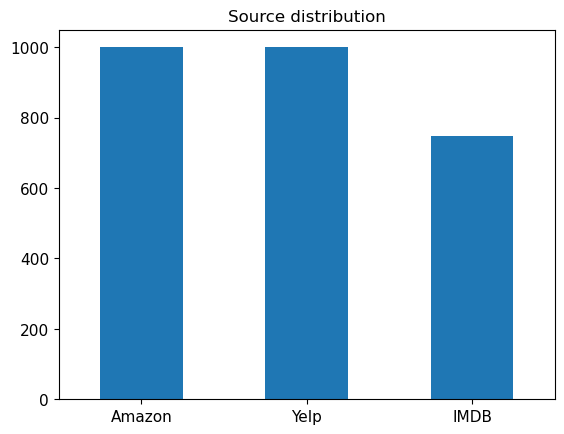

In [13]:
print(S.source.value_counts())

# plot barchart for X
S.source.value_counts().plot(kind = 'bar',
                                    title = 'Source distribution',
                                    #ylim = [0, 700],        
                                    rot = 0, fontsize = 11, 
                                    #figsize = (8,3)
                                    xlabel=''
                                    )

(2748, 3)


,review,sentiment,source
2516,"It's close to my house, it's low-key, non-fanc...",1,Yelp
2642,If you stay in Vegas you must get breakfast he...,1,Yelp
1359,"Let's start with all the problemsthe acting, ...",0,IMDB
1702,It's too bad that everyone else involved didn'...,0,IMDB
2660,"i felt insulted and disrespected, how could yo...",0,Yelp
...,...,...,...
158,And I just love the colors!,1,Amazon
1862,Good prices.,1,Yelp
861,It was a waste of my money.,0,Amazon
1307,About ten minutes into this film I started hav...,0,IMDB


source
Yelp      367
Amazon    357
IMDB      276
Name: count, dtype: int64


<AxesSubplot:title={'center':'Source distribution'}>

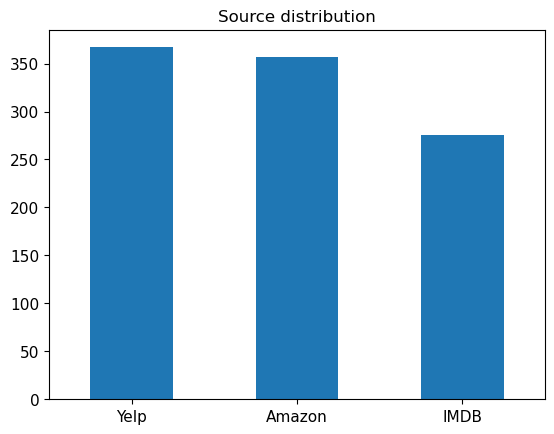

In [12]:
print(S.shape)
S_sample = S.sample(n=1000,random_state=42) #random state
display(S_sample)

print(S_sample.source.value_counts())

# plot barchart for X
S_sample.source.value_counts().plot(kind = 'bar',
                                    title = 'Source distribution',
                                    #ylim = [0, 700],        
                                    rot = 0, fontsize = 11, 
                                    #figsize = (8,3)
                                    xlabel=''
                                    )

<AxesSubplot:title={'center':'Category distribution'}>

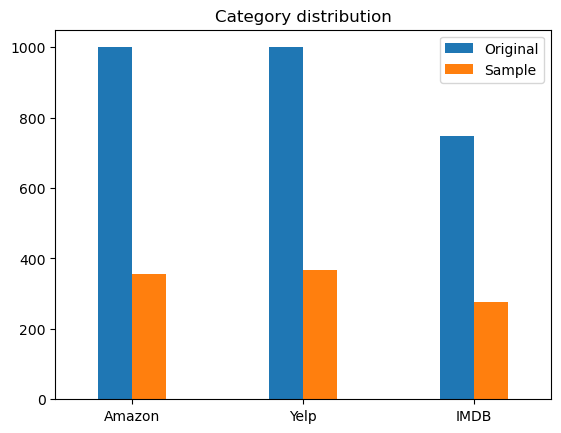

In [15]:
ct_count_orig = S.source.value_counts()
ct_count_sample = S_sample.source.value_counts()

S_plot = pd.DataFrame({'Original': ct_count_orig, 'Sample': ct_count_sample})
S_plot.sort_values(by='Original', ascending=False).plot(kind = 'bar',
                                                        title = 'Source distribution',
                                                        rot=0, fontsize=10,
                                                        #figsize = (10,6),
                                                        width = 0.4,
                                                        xlabel=''
                                                        )